# Principel Component Analysis (PCA)
PCA is a well-known algorithm for Dimensionality Reduction
- Reduces the number of features while keeping the features information

- Removes correlations among features

- Emphasizes variation of strong features, making the data easier to visualize

## EigenValue and Eigenvector of matrix
A martix's eigenvalues and eigenvectors are what we will use for the scalar value a and vector v respectively.

- **Eigenvector (v)** is a vector whose direction remains unchanged when a linear transformation is applied to it. They represent the rotation matrix
- **Eigenvalues (a)** represents the scalar value that is used such that when multiplied by v, gives the same value as Av

## Activity: Are the countries in great UK different in terms of food?
- In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK
- We want to visually represent the diffrence among UK countries based on the food they eat, but this can be difficult when there's 17 types of food (dimensions) to consider. The graph would be incredibly hard to read!
- This is where PCA comes in to play: through PCA, we can consolidate the 17 types into what we call principle components.
- Principle Components allow us to take an arbitrary number of data points (let's say 17) and consolidate them into a single (x, y) datapoint for a given feature.

### Question:
Which country is different from the the others? Any idea or reasoning?

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


df = pd.read_excel('../Data/pca_uk.xlsx')
X = np.array([df[i].values for i in df.columns if i != 'Features'])
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

print('Matrix of feature values')
print(X)
print('')
print('Matrix with PCA aplied, turing the 17 featuers into 2 features')
print(X_r)

Matrix of feature values
[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]]

Matrix with PCA aplied, turing the 17 featuers into 2 features
[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]


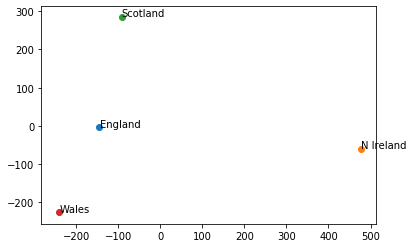

In [2]:
# Visualize the principle components

for feature, (plot_x,plot_y) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(plot_x, plot_y)
    plt.text(plot_x+0.3, plot_y+0.3, df.columns[:-1][feature])

plt.show()

### Answer: 
Ireland is different from other three countries in UK

### How much information in the original dataset is preserved in the principle components?
**Hint:** use pca.explained_variance_ratio_

In [3]:
print(pca.explained_variance_ratio_.cumsum())

[0.67444346 0.96496821]


## How to calculate the correlation of the principle components:

In [4]:
import scipy
print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))

Correlation of PCA Component:
(0.0, 1.0)


### Mini Activity: Write a function to reverse a given array

In [5]:
def reverse_array(arr):
    left, right = 0, len(arr)-1
    while left < right:
        arr[left], arr[right] = arr[right], arr[left]
        left += 1
        right -= 1
    return arr
        
print(reverse_array([1, 2, 3, 4]))

[4, 3, 2, 1]


## Activity: Lets write our own function to obtain principle components
1. Use the following matrix: X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])
2. Subtract the column mean from the feature matrix -> this new matrix will be our centered matrix
3. Calculate the covariance of the centered matrix (check out numpy's resources to see if there's a function that can 4. do this for you...) --> this new matrix will be our covariance matrix.
5. Calculate the eigenvalue and eigenvector of the covariance matrix. Remember how we did this in a previous activity!
6. Sort the eigevalues so that they are in decresing order, and then find the top N (for example, 2) eigenvectors
7. Dot multiply the centered matrix with the top N eigenvectors of the covariance matrix
8. Compare the result of custom function with PCA in sklearn

In [6]:
import numpy as np
from sklearn.decomposition import PCA
import scipy

X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])

print('Expected Result:')
print(pca.fit_transform(X))
print('')

print('Result Recieved:')
def PCA_calculations(data, n_comp):
    centered = data - np.mean(data, axis=0)
    covariance = np.cov(centered.T)
    eig_value, eig_vector = np.linalg.eig(covariance)
    idx = np.argsort(eig_value)[::-1] 
    # Using pythons sorted function doesn't work (probably because it's not a np array)
    top_n = idx[:n_comp]
    eig_vector = eig_vector[:, idx[:n_comp]]
    return np.dot(centered, eig_vector)

        
print(PCA_calculations(X, 2))

Expected Result:
[[-1.65392786 -0.2775295 ]
 [-0.84584087  0.31153366]
 [ 0.55130929  0.09250983]
 [ 1.94845944 -0.126514  ]]

Result Recieved:
[[ 1.65392786 -0.2775295 ]
 [ 0.84584087  0.31153366]
 [-0.55130929  0.09250983]
 [-1.94845944 -0.126514  ]]


## Activity: Apply PCA to Boston housing features and then train the linear regression model
- Basically, we remove correlation among features with PCA
- We do not need to do feature data scaling (normalization) when we do PCA for features
- Report the R-squared and MSE for a system with PCA+Linear Regression

In [7]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression


st_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
boston = load_boston()
ln_reg = LinearRegression()

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis=1)
y = bos['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
X_train_reduced = pca.fit_transform(X_train)
X_train_scaled = minmax_scaler.fit_transform(X_train_reduced)
X_test_reduced = pca.transform(X_test)

ln_reg.fit(X_train_reduced, y_train)
y_pred = ln_reg.predict(X_test_reduced)
print('R-Squared Score: ', r2_score(y_test, y_pred))

R-Squared Score:  0.10942786051559261


## As we can see, just because we perform preprocess doesn't improve the models score.